In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
##REad the dataset
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

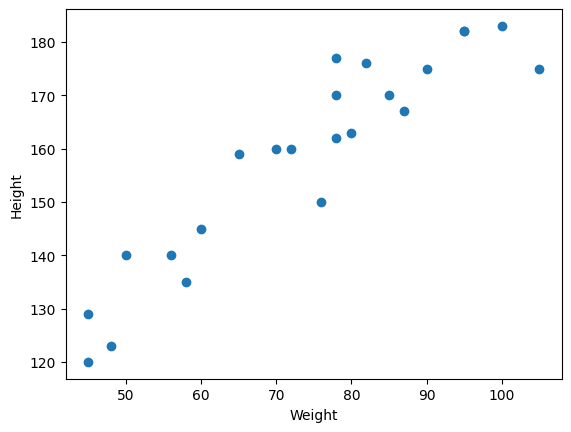

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [10]:
##divide our dataset into independent and dependent features
X=df[['Weight']]
y=df[['Height']]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [13]:
y_train

,Height
12,175
1,135
13,183
5,162
2,123
11,182
20,129
3,145
4,160
18,150


In [14]:
y_test

,Height
15,177
9,170
0,120
8,182
17,159


In [15]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

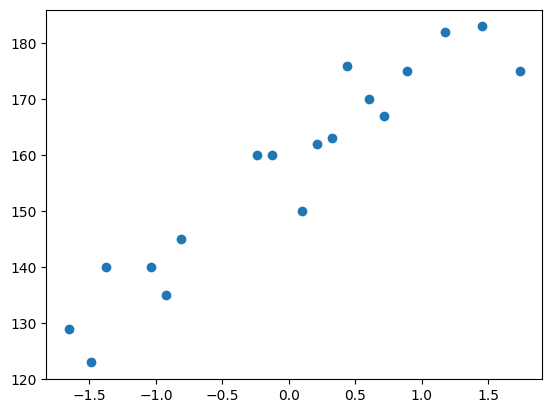

In [16]:
plt.scatter(X_train,y_train)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regressor=LinearRegression()

In [20]:
regressor

LinearRegression()

In [21]:
type(X_train)

numpy.ndarray

In [22]:
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

In [23]:
y_train.shape

(18, 1)

In [24]:
regressor.fit(X_train,y_train)

LinearRegression()

In [25]:
## coefficient and intercepts
print("Coefficient : ",regressor.coef_)
print("Intercept : ",regressor.intercept_)

Coefficient :  [[17.03440872]]
Intercept :  [157.5]


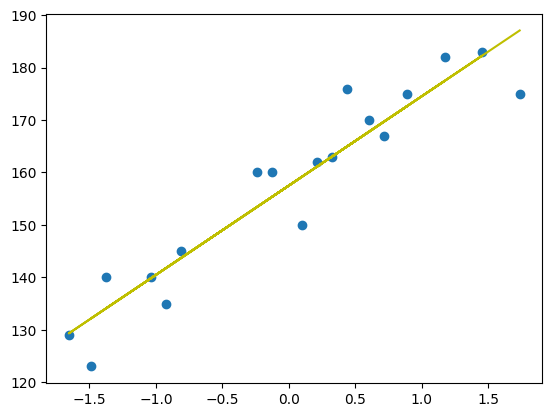

In [27]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'y')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =65.4364 + 1.26(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =65.4364 + 1.26(X_test)

In [28]:
y_pred_test=regressor.predict(X_test)

In [29]:
y_test

,Height
15,177
9,170
0,120
8,182
17,159


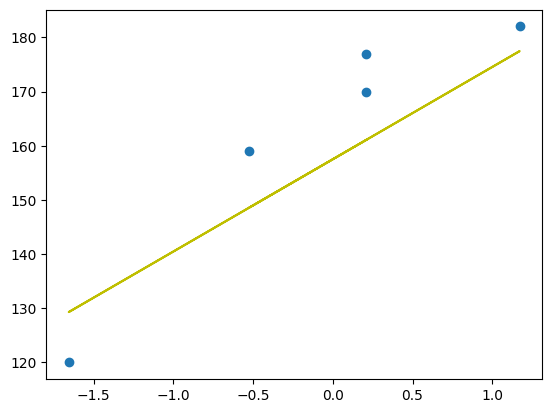

In [31]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'y')

In [32]:
### Performance metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [33]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [34]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [35]:
print(score)

0.776986986042344


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [36]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.776986986042344


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [37]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [41]:
regressor.predict(scaler.transform([[80]]))

C:\Users\Uyama\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[163.01076266]])

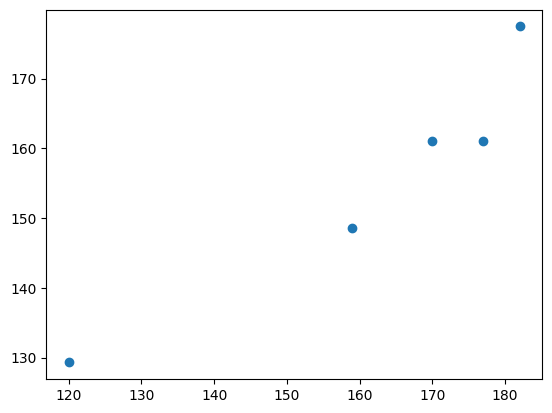

In [42]:
## Assumptions

## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)



In [43]:
## Residuals
residuals=y_test-y_pred_test

residuals



,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


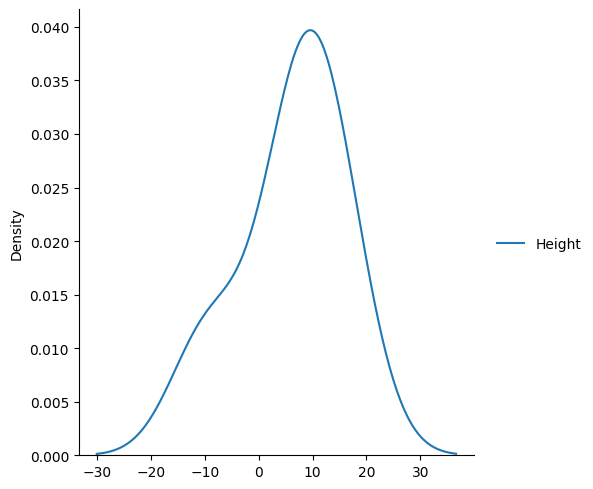

In [44]:
## Plot this residuals 
import seaborn as sns
sns.displot(residuals,kind="kde")



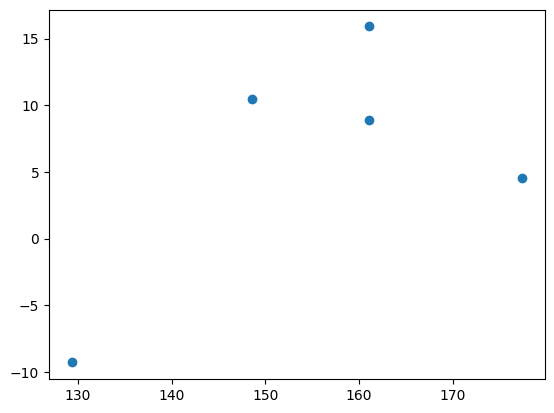

In [45]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)

## Using OLS

In [46]:
import statsmodels.api as sm

In [47]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 

In [48]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Tue, 13 Aug 2024   Prob (F-statistic):                       0.661
Time:                        11:08:27   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Uyama\miniconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [49]:
regressor.coef_

array([[17.03440872]])